In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import random
import numpy as np
import matplotlib.pyplot as plt

İhtiyacımız olan kütüphaneleri import ederek başlıyoruz. Sonrasında mnist datasetimizi yüklüyoruz. Tensorflow ile dataset yüklemenin birkaç çeşidi var. Train-test oranlarını verebilirdik vs. ya da tensor olarak alabilirdik. Ben daha rahat plot ederim diye np.array olarak yüklemek istedim image/label datasını. Train-test oranını da default ayarlasın istedim. 

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

https://www.tensorflow.org/api_docs/python/tf/keras/datasets buradan farklı datasetlerine de bakabilirsiniz

In [3]:
type(x_train)

numpy.ndarray

In [4]:
y_train.shape

(60000,)

In [5]:
x_test.shape

(10000, 28, 28)

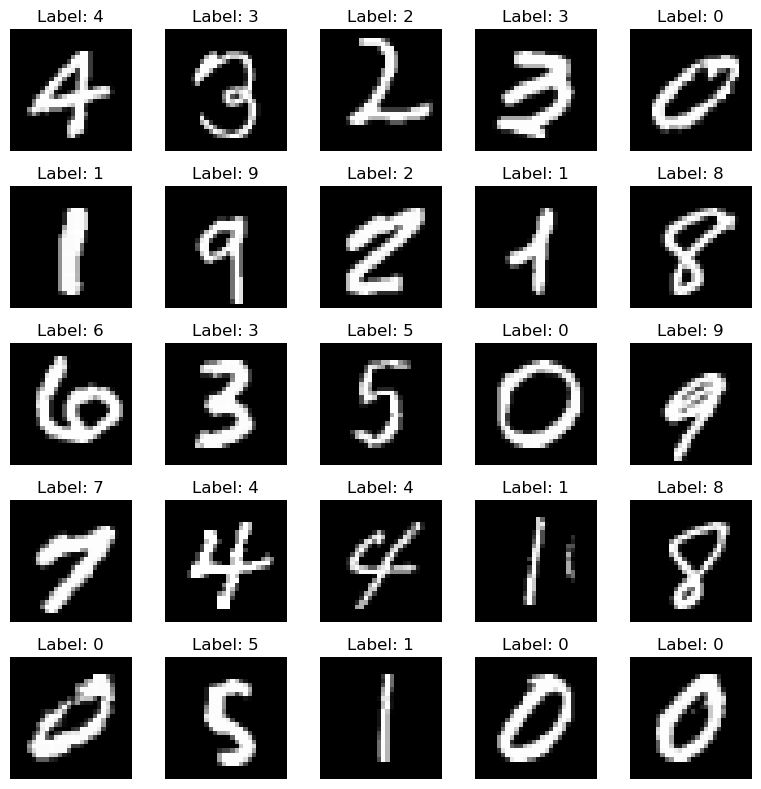

In [6]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    index = random.randint(0, x_train.shape[0])
    img = x_train[index]
    figure.add_subplot(rows, cols, i)
    plt.title("Label: " + str(y_train[index]))
    plt.axis("off")
    plt.tight_layout()
    plt.imshow(img, cmap='gray', interpolation='none')
plt.show()

Train setimizden random örnekler. Subplot'un satır sütun sayısını değiştirerek daha çok örnek yazdırabilirsiniz ekrana.

In [7]:
def normalization(image, label):
    return image / 255.0, label
xn_train, yn_train = normalization(x_train, y_train)
xn_test, yn_test = normalization(x_test, y_test)

Daha optimum bir çalışma için image setlerimizi normalize ediyoruz. Normalize etmeden çalıştırmak için return kısmını return image, label yapıp bırakabilirsiniz.

In [8]:
xn_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Değerler artık 0-1 arasında 0-255 değil

In [9]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape = (28, 28)),
        tf.keras.layers.Dense(64, activation = 'relu'),
        tf.keras.layers.Dense(32, activation = 'relu'),
        tf.keras.layers.Dense(16, activation = 'relu'),
        tf.keras.layers.Dense(10)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 10)                170       
                                                                 
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
_________________________________________________________________


Flatten inputumuzun shape'ini ayarlıyor ve düzleştiriyor. 10 rakam olduğu için 10 tahmin yani (10,) shape'inde bir output çıkması lazım. Flatten olmazsa input shape (28, 28) olduğu için output (28, 10) olabilir. Flatten satırını silip deneyebilirsiniz.

Bu linkten anladığım buydu https://stackoverflow.com/questions/43237124/what-is-the-role-of-flatten-in-keras

In [10]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()],
)

model.fit(
    xn_train, yn_train,
    epochs = 10,
    validation_data = (xn_test, yn_test)
)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3353 - sparse_categorical_accuracy: 0.8997 - val_loss: 0.1632 - val_sparse_categorical_accuracy: 0.9500
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1426 - sparse_categorical_accuracy: 0.9581 - val_loss: 0.1175 - val_sparse_categorical_accuracy: 0.9623
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1038 - sparse_categorical_accuracy: 0.9682 - val_loss: 0.1048 - val_sparse_categorical_accuracy: 0.9683
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0830 - sparse_categorical_accuracy: 0.9748 - val_loss: 0.0948 - val_sparse_categorical_accuracy: 0.9731
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0693 - sparse_categorical_accuracy: 0.9779 - val_loss: 0.0913 - val_sparse_categorical_accuracy: 0.9724
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0588 - spars

Multiclass classification yaptığımız için CategoricalCrossentropy ile loss hesabı yapıyoruz.
Adam ile optimize etmeyi tercih ettim. Learning_rate'in değerini ya da optimizer'i değiştirip aldığınız sonuçlara bakabilirsiniz.
Metrics de tahminlerin label'lar ile ne kadar eşleştiğini test etmek için kullanılıyor. Farklı metricsler var ama multiclass çalıştığımız için Categorical metrics kullanmalıyız diye düşündüm

In [11]:
pred = model.predict(x_test)

false = [i for i,v in enumerate(pred) if np.argmax(pred[i])!=y_test[i]]
true = [i for i, v in enumerate(pred) if np.argmax(pred[i])==y_test[i]]
accuracy = len(true) / (len(true)+len(false)) * 100
    
print(len(true))
print(len(false))
print(accuracy)

313/313 [==============================] - 1s 1ms/step
9755
245
97.55


Burada yanlış tahminlere ulaşmak için böyle bir yol izledim. Daha optimum bir yolu vardır diye düşünüyorum. Basitçe tüm tahminlerin içindeki her 10 tahmini gezen bir pointer ile, (çok uzun bir cümle olacak) bu her 10 tahmin içerisinden maksimum olan tahminin indexini alıyoruz ve gerçek label'ı ile karşılaştırıyoruz. Yani aslında 10 tane rakam içinden en yüksek olasılık verdiği rakama np.argmax ile ulaşıyoruz.

Böylece false içinde tüm yanlış tahmin edilen test görsellerinin indexi elimizde oluyor.

In [12]:
print(false)

[115, 124, 149, 151, 175, 247, 321, 340, 359, 391, 412, 432, 445, 448, 495, 497, 508, 530, 582, 610, 619, 684, 710, 740, 844, 900, 951, 956, 965, 1014, 1039, 1044, 1112, 1181, 1182, 1226, 1242, 1247, 1260, 1272, 1299, 1319, 1328, 1414, 1441, 1444, 1500, 1522, 1530, 1549, 1553, 1581, 1670, 1681, 1701, 1737, 1751, 1754, 1790, 1800, 1878, 1901, 1911, 1952, 1984, 2004, 2016, 2024, 2035, 2053, 2063, 2070, 2098, 2109, 2118, 2130, 2135, 2182, 2186, 2224, 2237, 2272, 2293, 2325, 2334, 2369, 2387, 2406, 2414, 2447, 2514, 2526, 2597, 2607, 2617, 2648, 2654, 2678, 2743, 2877, 2896, 2921, 2927, 2939, 2953, 2979, 3005, 3030, 3073, 3115, 3117, 3173, 3289, 3330, 3333, 3405, 3422, 3451, 3490, 3503, 3520, 3549, 3558, 3559, 3567, 3597, 3681, 3718, 3749, 3751, 3767, 3780, 3808, 3876, 3906, 3926, 3941, 3976, 4065, 4078, 4100, 4154, 4163, 4199, 4201, 4224, 4238, 4248, 4360, 4382, 4400, 4425, 4437, 4497, 4536, 4540, 4547, 4567, 4575, 4615, 4635, 4740, 4814, 4879, 4880, 4911, 4915, 4966, 5331, 5450, 5457, 54

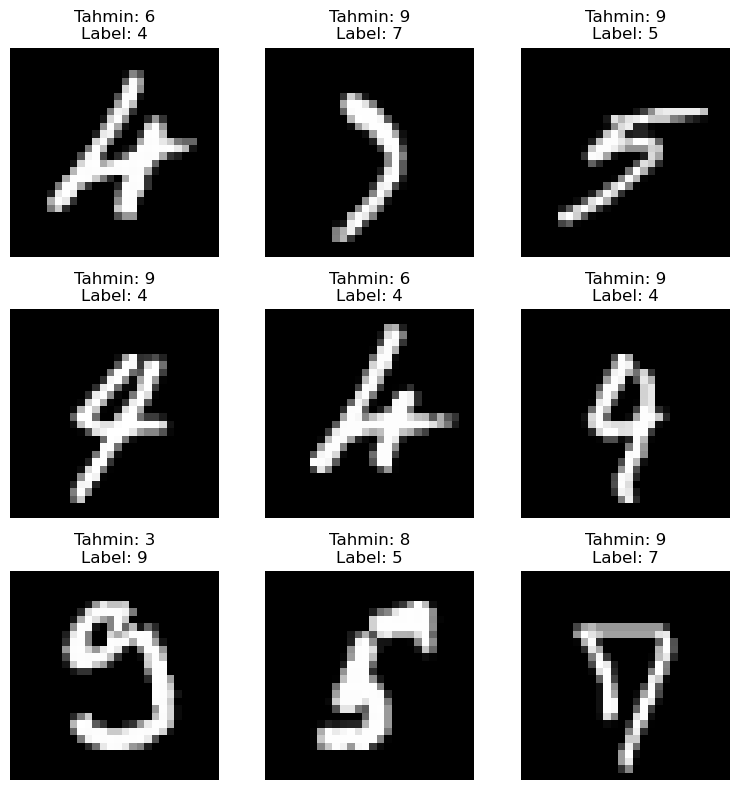

In [13]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    index = false[random.randint(0, len(false))]
    img = x_test[index]
    figure.add_subplot(rows, cols, i)
    plt.title("Tahmin: " + str(np.argmax(pred[index])) + "\nLabel: " + str(y_test[index]))
    plt.axis("off")
    plt.tight_layout()
    plt.imshow(img, cmap='gray', interpolation='none')
plt.show()